# Hands On Tutorial

## Example 1

Create random sat formula via URGenerator and check if a random assignment satisfies it.

In [2]:
from src.sat_generator import URGenerator
from src.solvers import random_solver
#import src.utils as utils

In [3]:
# Create a sat generator
sat_gen = URGenerator(min_n = 5,
                      max_n = 5,
                      min_k = 3,
                      max_k = 3,
                      min_m = 20,
                      max_m = 20)

In [4]:
# Create a random sat formula
n, m, r, formula = sat_gen.generate_formula()

print(f'n: {n}')
print(f'm: {m}')
print(f'r: {r}')
print(formula)

n: 5
m: 20
r: 4.0
[[1, 5, -4], [-2, 1, 3], [-5, 3, 4], [2, -1, 5], [3, -2, -4], [-1, -4, 5], [4, -1, -3], [3, 4, 1], [-3, -1, -2], [-5, 2, 4], [5, -3, -4], [-2, 4, -5], [-2, 5, 4], [2, 1, -3], [-1, 3, -5], [-2, 5, -3], [3, -4, 1], [3, -5, 2], [1, 3, 5], [-1, 2, 4]]


In [5]:
# Create a random assignment
#assignment = utils.random_assignment(n=n)
# Verifying whether the assinment satisfied the formula
#is_sat, num_sat, eval_formula = utils.assignment_verifier(formula, assignment)

assignment, num_sat = random_solver(n, formula)
print(f'assignment: {assignment}')
print(f'num of sat clauses: {num_sat} out of {m}')

assignment: [1 0 0 0 0]
num of sat clauses: 18 out of 20


## Example 2

Create a pair of random formulas via SRGenerator and use minisat_solver to check whether the formulas are sat or unsat.

In [6]:
from src.sat_generator import SRGenerator
from src.solvers import minisat_solver
#import PyMiniSolvers.minisolvers as minisolvers

In [7]:
# Create a sat generator
sat_gen = SRGenerator(n = 20, 
                      p_bernoulli = 0.7,
                      p_geometric = 0.4)

In [8]:
# Create a random sat formula
n, m, r, [formula_unsat, formula_sat] = sat_gen.generate_formula()

print(f'n: {n}')
print(f'm: {m}')
print(f'r: {r}')

n: 20
m: 148
r: 7.4


In [9]:
print(formula_sat)

[[-8, 16, -10], [-16, -2, 8, -6, -14], [9, 17, -1, -7, 12, 18, -2], [8, 3, -14, 19, 5, -20], [-10, 16, 9], [-10, -6], [11, -19, 3], [-4, 12], [20, -13, -3, -17, -7, 18], [-9, 1, 11], [8, -1, -2], [-17, -10, -6, -5, -4], [16, 15, -20], [-6, -19, 5, 9, -12], [-12, 18, -4, -10, 17, 7, -11], [9, 17, 20], [-20, -10, 2], [-17, -1, -13, 12, -19, -4], [6, -10, -12], [11, 15, 1, -18, -20, -5], [5, -10, -17, -16], [11, -3, -2], [7, 9], [-2, 10, 6, -8, 16, -3], [7, 12, 1, -2, 13, -20, -10], [-11, 12, -18, 13], [15, 5, -9, 18], [-9, -8, -16, -4, -14, -12], [-9, 16, 6, 7, -8, -10, -18], [-1, 12, 14, -3, -7], [17, 10, -14, -19, 15, 20], [8, -11, 17, -15, 6, 1, -10], [1, 5, 6, -8, -10], [-14, 11, -2], [-7, -14, 6], [-3, -2, -15], [17, 5, 14], [-20, -7, 4], [5, -1, -18], [-13, 17, -8, 20, 9, -7, -12, 11], [-12, -5, 14, 16, 9], [-18, -5, 13], [13, 12, -19, 6], [3, -19, -18], [-11, -20, 9], [-16, 19, -20, -10], [12, 11], [7, 2, 13], [3, 4, -15], [17, -8, -10, -9, 7], [7, 9], [-7, -12, -19, -1, -13, 4, 9

In [9]:
#solver = minisolvers.MinisatSolver()
#for i in range(n):
#    solver.new_var()
#for clause in formula_sat:
#    solver.add_clause(clause)
#print(solver.solve())

assignment, is_sat = minisat_solver(n, formula_sat)
print(f'assignment: {assignment}') # None means there is no assigment that satisfies the formula.
print(f'is_sat: {is_sat}')

assignment: [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]
is_sat: True


In [10]:
print(formula_unsat)

[[-15, 7, 6], [10, -20, 1, 6], [-8, 15, -10], [15, -19, 7], [-18, -7], [9, 18, -8], [16, 4, -12], [4, 10, -9, -13, 16], [-11, -16], [2, -20, 14], [17, -10, -11], [15, 20, -7, 11, -4, 12, -5, 16], [-20, 8, -11, -18, -3, -12, -7, -19], [-1, 16], [-10, 6, -12, -14], [14, 20, 10, -6, -1], [11, 18, 16, -19, -6, -20], [7, 1, 18, 8, 9, -15], [-12, 16, 14, -4, 3, -13, 18, 7], [10, -6, 16, -17], [-9, -12, -20, -10], [19, -16, -9, 13, 11, 12, -18, 3, 2, 15, 17, -8, -1], [-8, -1, 18, -2, -3], [14, 13, 1, 10], [-10, 7, 1, 2, 20, 14], [1, 20, 4], [-8, 18, -3, -4], [-13, -17, 12], [-3, 11, -20, 4, -1, -8], [-6, 14, -20], [-15, -7, 17], [-14, -17, 7, 12], [-9, -2, -20, -12, -10], [-10, 18, 8, 19], [-7, -17, 6, -16, 8, 2], [3, -19, -13], [13, 16, 2, -20, 1], [19, -13, -15], [-20, 19, -8, 18, -17, -1], [7, -14, -9], [-17, 1, 5, 14], [-14, -18, -20, -8], [18, -7, -6, -15, -3, -5], [12, 19, -4], [9, -2, 15, -10, 19], [5, 9, -6, -2], [-4, -8, -19, 11, -2], [9, -20, 15, 19, 2, -17, -5, -1], [-12, -5, 11, 2

In [11]:
#solver = minisolvers.MinisatSolver()
#for i in range(n):
#    solver.new_var()
#for clause in formula_sat:
#    solver.add_clause(clause)
#print(solver.solve())

assignment, is_sat = minisat_solver(n, formula_unsat)
print(f'assignment: {assignment}') # None means there is no assigment that satisfies the formula.
print(f'is_sat: {is_sat}')

assignment: None
is_sat: False


## Example 3

Load a uf20-91 instance from the SATLIB dataset and check if a random assignment satisfies the formula.

SATLIB: https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html

In [12]:
from src.solvers import random_solver
import src.utils as utils

In [13]:
dimacs_path =  'data/uf20-91/uf20-01.cnf'
n, m, formula = utils.dimacs2list(dimacs_path = dimacs_path)

print(f'n: {n}')
print(f'm: {m}')
print(f'r: {m/n}')
print()
print(formula)

n: 20
m: 91
r: 4.55

[[4, -18, 19], [3, 18, -5], [-5, -8, -15], [-20, 7, -16], [10, -13, -7], [-12, -9, 17], [17, 19, 5], [-16, 9, 15], [11, -5, -14], [18, -10, 13], [-3, 11, 12], [-6, -17, -8], [-18, 14, 1], [-19, -15, 10], [12, 18, -19], [-8, 4, 7], [-8, -9, 4], [7, 17, -15], [12, -7, -14], [-10, -11, 8], [2, -15, -11], [9, 6, 1], [-11, 20, -17], [9, -15, 13], [12, -7, -17], [-18, -2, 20], [20, 12, 4], [19, 11, 14], [-16, 18, -4], [-1, -17, -19], [-13, 15, 10], [-12, -14, -13], [12, -14, -7], [-7, 16, 10], [6, 10, 7], [20, 14, -16], [-19, 17, 11], [-7, 1, -20], [-5, 12, 15], [-4, -9, -13], [12, -11, -7], [-5, 19, -8], [1, 16, 17], [20, -14, -15], [13, -4, 10], [14, 7, 10], [-5, 9, 20], [10, 1, -19], [-16, -15, -1], [16, 3, -11], [-15, -10, 4], [4, -15, -3], [-10, -16, 11], [-8, 12, -5], [14, -6, 12], [1, 6, 11], [-13, -5, -1], [-7, -2, 12], [1, -20, 19], [-2, -13, -8], [15, 18, 4], [-11, 14, 9], [-6, -15, -2], [5, -12, -15], [-6, 17, 5], [-13, 5, -19], [20, -1, 14], [9, -17, 15], [-5

In [14]:
# Create a random assignment
#assignment = utils.random_assignment(n=n)
# Verifying whether the assignment satisfied the formula
#is_sat, num_sat, eval_formula = utils.assignment_verifier(formula, assignment)

assignment, num_sat = random_solver(n, formula)
print(f'assignment: {assignment}')
print(f'num of sat clauses: {num_sat} out of {m}')

assignment: [0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1]
num of sat clauses: 80 out of 91


# ***Hasta aquí llega el tutorial de momento***

## Example 4

Load a uf20-91 instance from the SATLIB dataset and check if a the policy gradient solver satisfies the formula.

SATLIB: https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html

In [1]:
from src.solvers import pg_solver
import src.utils as utils

In [2]:
dimacs_path =  'data/uf20-91/uf20-01.cnf'
n, m, formula = utils.dimacs2list(dimacs_path = dimacs_path)

print(f'n: {n}')
print(f'm: {m}')
print(f'r: {m/n}')
print()
print(formula)

n: 20
m: 91
r: 4.55

[[4, -18, 19], [3, 18, -5], [-5, -8, -15], [-20, 7, -16], [10, -13, -7], [-12, -9, 17], [17, 19, 5], [-16, 9, 15], [11, -5, -14], [18, -10, 13], [-3, 11, 12], [-6, -17, -8], [-18, 14, 1], [-19, -15, 10], [12, 18, -19], [-8, 4, 7], [-8, -9, 4], [7, 17, -15], [12, -7, -14], [-10, -11, 8], [2, -15, -11], [9, 6, 1], [-11, 20, -17], [9, -15, 13], [12, -7, -17], [-18, -2, 20], [20, 12, 4], [19, 11, 14], [-16, 18, -4], [-1, -17, -19], [-13, 15, 10], [-12, -14, -13], [12, -14, -7], [-7, 16, 10], [6, 10, 7], [20, 14, -16], [-19, 17, 11], [-7, 1, -20], [-5, 12, 15], [-4, -9, -13], [12, -11, -7], [-5, 19, -8], [1, 16, 17], [20, -14, -15], [13, -4, 10], [14, 7, 10], [-5, 9, 20], [10, 1, -19], [-16, -15, -1], [16, 3, -11], [-15, -10, 4], [4, -15, -3], [-10, -16, 11], [-8, 12, -5], [14, -6, 12], [1, 6, 11], [-13, -5, -1], [-7, -2, 12], [1, -20, 19], [-2, -13, -8], [15, 18, 4], [-11, 14, 9], [-6, -15, -2], [5, -12, -15], [-6, 17, 5], [-13, 5, -19], [20, -1, 14], [9, -17, 15], [-5

In [3]:
import torch
import torch.optim as optim

from src.sat_generator import URGenerator
from src.solvers import random_solver, pg_solver

from src.train import train
import src.utils as utils

from src.utils import probs2plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from os import listdir

In [68]:
config = {
    # Architecture
    "cell": 'GRU',
    "hidden_size": 128,
    "num_layers": 1,
    
    ## Embeddings
    "embedding_size": 64,

    ## Regularization
    "dropout": 0,

    # Training hyperparameters
    "accumulation_steps": 5,
    "lr": 0.0001,
    "baseline": 5,  # None, -1, 1, 2, 3, 4, 5
    "batch_size": 1,
    "permute_vars": False,
    "permute_seed": None, #2147483647
    "clip_grad": 1,
    "entropy_weight": 0,
    "num_episodes": 5000,
    "gpu": True,
    "verbose": 1,
    "raytune": False,
    "episode_log": True,  # True, False
    "episode_log_step": 100,  # 1, 2,... 
    "optimizer_log": True,
    "optimizer_log_step": 2,
    "experiment_name": 'basic_run',

    "checkpoint_dir": None,
    "data_dir": os.path.abspath('data/uf20-91/uf20-01.cnf')
}

# Run policy gradient solver
pg_solver(config)


Greedy actions (train): tensor([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]])

Greedy actions (val): tensor([[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]])
Optim step 1000, Episode [5000/5000], Mean loss 3.0519,  Mean num sat 88.4000, Val loss 177.3624, Val num sat 89.0000


In [69]:
from tbparse import SummaryReader
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "logs_tf/basic_run/20221019T234908_optimizer_log_n20"

# Read tensorboard logs with tbparser
reader = SummaryReader(log_dir, pivot=False)  # extra_columns={'dir_name'}
df = reader.tensors
df

,step,tag,value
0,10,mean_loss,15.384129
1,20,mean_loss,27.919893
2,30,mean_loss,1.424792
3,40,mean_loss,10.970133
4,50,mean_loss,-2.552851
...,...,...,...
1995,4960,val_num_sat,89.000000
1996,4970,val_num_sat,89.000000
1997,4980,val_num_sat,89.000000
1998,4990,val_num_sat,89.000000


In [9]:
df.tag.unique()

array(['mean_loss', 'mean_num_sat', 'val_loss', 'val_num_sat'],
      dtype=object)

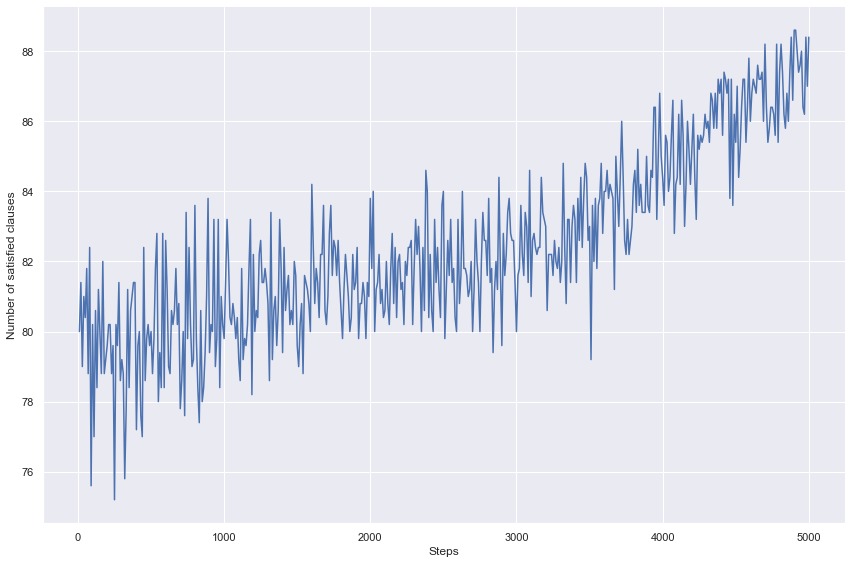

In [74]:
g = sns.relplot(x="step",
            y="value",
            #hue="strategy",
            #style="tag",
            kind="line",
            data=df.query("tag == 'mean_num_sat'"),
            #data=df.query("tag == 'mean_num_sat' or tag == 'val_num_sat'"),
            palette='bright',
            height=8,
            aspect=1.5);

g.set_axis_labels("Steps", "Number of satisfied clauses")